In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data = yf.download('SBIN.NS', start='2018-04-01', end='2023-03-31',interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,251.800003,252.000000,244.899994,246.149994,235.572601,14993188
2018-04-03,249.550003,252.800003,248.250000,250.500000,239.735687,19883309
2018-04-04,251.699997,253.000000,245.500000,247.300003,236.673218,18824449
2018-04-05,252.600006,261.899994,250.000000,259.299988,248.157532,22880821
2018-04-06,259.649994,261.450012,254.850006,259.700012,248.540344,24868860
...,...,...,...,...,...,...
2023-03-23,519.400024,521.000000,511.500000,512.750000,502.975922,22097792
2023-03-24,514.500000,514.950012,503.450012,505.350006,495.716980,14416984
2023-03-27,507.000000,514.150024,501.549988,510.149994,500.425476,15674218


In [15]:
def gain_loss(series):
    series=np.array(series)
    change_list=[]
    gains=[]
    losses=[]
    for i in range(len(series)-1):
        change_list.append(series[i+1]-series[i])
    for k in change_list:
        if k>0:
            gains.append(round(k,2))
        else:
            gains.append(0)
    for j in change_list:
        if j<0:
            losses.append(abs(round(j,2)))
        else:
            losses.append(0)
    return [gains,losses]

def avg_gain_loss(period,series):
    series = np.array(series)
    average_gains=[]
    avg = series[:period].mean()
    average_gains.append(round(avg,2))
    prev_avg_gain=avg
    for i in range(period,len(series)):
        avg_gain_val = ((prev_avg_gain*(period-1))+series[i])/period
        prev_avg_gain = avg_gain_val
        average_gains.append(round(avg_gain_val,2))
    return(average_gains)

Gain=gain_loss(data['Close'])[0]
Loss=gain_loss(data['Close'])[1]
Avg_Gains=avg_gain_loss(14,Gain)
Avg_Loss=avg_gain_loss(14,Loss)
RS = [round(x/y,2) for x,y in zip(Avg_Gains,Avg_Loss)]
RSI=[round((100-(100)/(1+rs)),2) for rs in RS]



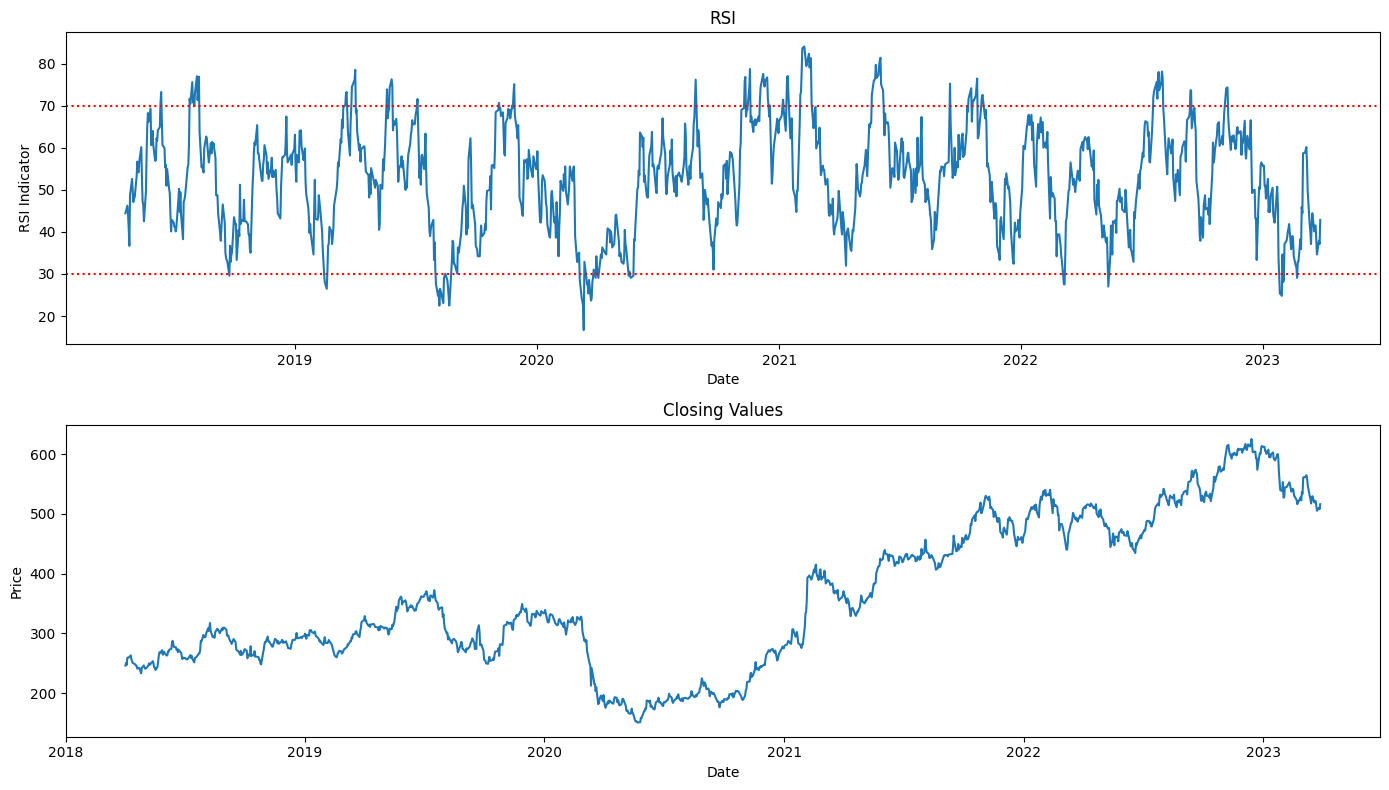

In [16]:
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
plt.plot(data.index[14:],RSI)
plt.axhline(70,color='red',linestyle='dotted')
plt.axhline(30,color='red',linestyle='dotted')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI Indicator')
plt.subplot(2,1,2)
plt.plot(data.index,data['Close'])
plt.title('Closing Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
